In [1]:
from keras.layers import Conv2D, InputLayer, UpSampling2D
import numpy as np
import csv
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.viewer import ImageViewer
from skimage.io import imsave
import glob
import os
%matplotlib inline

C:\Users\hp\Anaconda3\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


In [4]:
from keras.models import load_model

In [2]:
img_dir = "./gray1" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
x_train = [] 
for f1 in files: 
    img = cv2.imread(f1,0) 
    img=img[:144,:144]
    img =img.flatten()
    for j in img:
        x_train.append(j)

In [ ]:
img_dir = "./color1" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
y_train = [] 

for f1 in files: 
    img = cv2.imread(f1,1) 
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=img[:144,:144,:]
    img =img.flatten()
    for j in img:
        y_train.append(j)

In [7]:
x_train=np.array(x_train)
x_train=x_train.reshape(2994,144,144,1);

In [5]:
y_train=np.array(y_train)
y_train=y_train.reshape(2994,144,144,3);

In [8]:
x_train= 1.0/255* x_train

In [7]:
y_train = 1.0/255* y_train

In [8]:
model = Sequential()
model.add(InputLayer(input_shape =(None, None, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [9]:
model.compile(optimizer='rmsprop', loss='mse')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 64)    640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 256)   295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 256)   590080    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, None, 512)   1

In [11]:
model.fit(x=x_train, 
    y=y_train,
    batch_size=32,
    epochs=50)

Epoch 1/50
94/94 [==============================] - 430s 5s/step - loss: 0.1983
Epoch 2/50
94/94 [==============================] - 440s 5s/step - loss: 0.0452
Epoch 3/50
94/94 [==============================] - 433s 5s/step - loss: 0.0337
Epoch 4/50
94/94 [==============================] - 432s 5s/step - loss: 0.0292
Epoch 5/50
94/94 [==============================] - 434s 5s/step - loss: 0.0262
Epoch 6/50
94/94 [==============================] - 455s 5s/step - loss: 0.0250
Epoch 7/50
94/94 [==============================] - 427s 5s/step - loss: 0.0238
Epoch 8/50
94/94 [==============================] - 415s 4s/step - loss: 0.0227
Epoch 9/50
94/94 [==============================] - 417s 4s/step - loss: 0.0221
Epoch 10/50
94/94 [==============================] - 419s 4s/step - loss: 0.0212
Epoch 11/50
94/94 [==============================] - 418s 4s/step - loss: 0.0208
Epoch 12/50
94/94 [==============================] - 398s 4s/step - loss: 0.0204
Epoch 13/50
94/94 [==================

In [12]:
model.save('C:/Users/hp/Downloads/AI-image-colorization-master/AI-image-colorization-master/Code/Alpha-Model/alpha_final.hdf5')

In [9]:
model = load_model('C:/Users/hp/Downloads/AI-image-colorization-master/AI-image-colorization-master/Code/Alpha-Model/alpha_final.hdf5')

In [12]:
pred=model.predict(x_train)

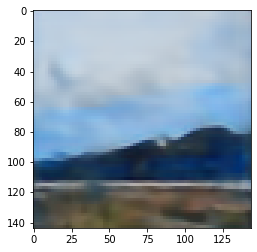

In [26]:
plt.imshow(pred[121])

In [24]:
img1 = x_train[121].reshape(144,144)

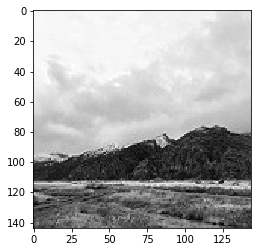

In [25]:
plt.imshow(img1,cmap='gray')

In [20]:
type(x_train[0])
print(x_train[0].shape)

(144, 144, 1)
